### imports

In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm as tq

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Given Data

In [2]:
root = "/kaggle/input/toi-2018-news-articles/data/"
art_list = os.listdir(root)
print(f"total articles {len(art_list)}")
print("sample titles: ")
print(*art_list[:3], sep='\n')

total articles 137491
sample titles: 
2018724_city_delhi_city-hotspot-that-saw-nearly-24k-protests-a-year-is-abuzz-again.txt
2018722_city_patna_not-afraid-of-rjds-no-trust-motion-bjp.txt
201866_city_jodhpur_rs-100-cr-eco-tourism-plan-set-to-get-centres-nod.txt


In [3]:
contents = [open(root+i).read() for i in tq(art_list, leave=False)]
print("sample content :")
print(contents[10])

sample content :
[NAGPUR: Musical programme ‘Swar Yatra’ took the audience on a journey of Bhojpuri folk music that brought the beauty of spring while ballads on soil and soul spread the fragrance of the season at a programme jointly organized by Kala Vaibhav and Bihar Sanskrutik Mandal at Dr Vasantrao Deshpande Hall on Friday. The programme, organized in memory of renowned folk singer Padma Shri Vindhyavanshi Devi, began with ‘Sarasvati vandana’, presented by three generations of a family — Madhubala and Meenakshi Shrivastav, and Anushka Verma. Madhubala Shrivastav, popularly known as ‘Nightingale of Bhojpuri music’, regaled the audience with the rendition of songs on ‘Vasant ritu’, soil and soul. Her ‘Jhoomar’ song and a piece in raag Pahadi were well-received. Rasika Karmalikar presented classical song ‘Rangi sawale gulabi chunariya’, based on raag Pahadi. Bhojpuri folk singer Avdhesh Kumar lit up the stage with ‘Chunariya mein daag’ and a folk song describing the beauty of monsoon 

## Data Preparation

### dataframe of title and content

In [4]:
df = pd.DataFrame(list(zip(art_list, contents)), columns=['title', 'content'])
df.head()

,title,content
0,2018724_city_delhi_city-hotspot-that-saw-nearl...,[NEW DELHI: Jantar Mantar had never been so qu...
1,2018722_city_patna_not-afraid-of-rjds-no-trust...,[PATNA: The BJP on Saturday said if the RJD de...
2,201866_city_jodhpur_rs-100-cr-eco-tourism-plan...,[JAIPUR: Rajasthan’s proposal to create an eco...
3,2018926_city_chennai_cyclonic-circulation-in-b...,[CHENNAI: The city is expected to get more rai...
4,2018819_business_india-business_mitashi-eyes-d...,"[Mumbai, Aug 19 () Homegrown consumer durables..."


### get the date_part and tag from title

In [5]:
df['date'] = df.title.apply(lambda x: int(x.split('_')[0]))
df['tag'] = df.title.apply(lambda x: ("_".join(x.split('-')[0].split('_')[1:-1])))
df.head()

,title,content,date,tag
0,2018724_city_delhi_city-hotspot-that-saw-nearl...,[NEW DELHI: Jantar Mantar had never been so qu...,2018724,city_delhi
1,2018722_city_patna_not-afraid-of-rjds-no-trust...,[PATNA: The BJP on Saturday said if the RJD de...,2018722,city_patna
2,201866_city_jodhpur_rs-100-cr-eco-tourism-plan...,[JAIPUR: Rajasthan’s proposal to create an eco...,201866,city_jodhpur
3,2018926_city_chennai_cyclonic-circulation-in-b...,[CHENNAI: The city is expected to get more rai...,2018926,city_chennai
4,2018819_business_india-business_mitashi-eyes-d...,"[Mumbai, Aug 19 () Homegrown consumer durables...",2018819,business


### get the year month day from the date part

In [6]:
months = [i for i in range(1, 13)]
days = [i for i in range(1, 32)]

def convert(x):
    x = str(x)
    splits = [(int(x[:k]), int(x[k:])) for k in range(1, len(x))]
    for i, j in splits:
        if i in months and j in days: 
            return i, j

df['year'] = df.title.apply(lambda x: int(x.split('_')[0][:4]))
rest = df.title.apply(lambda x: int(x.split('_')[0][4:]))
a = rest.apply(convert)
df['month'] = [i[0] for i in a]
df['day'] = [i[1] for i in a]
df.head()

,title,content,date,tag,year,month,day
0,2018724_city_delhi_city-hotspot-that-saw-nearl...,[NEW DELHI: Jantar Mantar had never been so qu...,2018724,city_delhi,2018,7,24
1,2018722_city_patna_not-afraid-of-rjds-no-trust...,[PATNA: The BJP on Saturday said if the RJD de...,2018722,city_patna,2018,7,22
2,201866_city_jodhpur_rs-100-cr-eco-tourism-plan...,[JAIPUR: Rajasthan’s proposal to create an eco...,201866,city_jodhpur,2018,6,6
3,2018926_city_chennai_cyclonic-circulation-in-b...,[CHENNAI: The city is expected to get more rai...,2018926,city_chennai,2018,9,26
4,2018819_business_india-business_mitashi-eyes-d...,"[Mumbai, Aug 19 () Homegrown consumer durables...",2018819,business,2018,8,19


### get the headline from title and cleanup the content

In [7]:
df['headline'] = df.title.apply(lambda x: (x.split('-')[0].split('_')[-1] + '-' + '-'.join(x.split('-')[1:])).replace("-", " ")[:-3])
df['content'] = df.content.apply(lambda x: x[1:-1])
df.head()

,title,content,date,tag,year,month,day,headline
0,2018724_city_delhi_city-hotspot-that-saw-nearl...,NEW DELHI: Jantar Mantar had never been so qui...,2018724,city_delhi,2018,7,24,city hotspot that saw nearly 24k protests a ye...
1,2018722_city_patna_not-afraid-of-rjds-no-trust...,PATNA: The BJP on Saturday said if the RJD dec...,2018722,city_patna,2018,7,22,not afraid of rjds no trust motion bjp.
2,201866_city_jodhpur_rs-100-cr-eco-tourism-plan...,JAIPUR: Rajasthan’s proposal to create an eco-...,201866,city_jodhpur,2018,6,6,rs 100 cr eco tourism plan set to get centres ...
3,2018926_city_chennai_cyclonic-circulation-in-b...,CHENNAI: The city is expected to get more rain...,2018926,city_chennai,2018,9,26,cyclonic circulation in bay may bring rain to ...
4,2018819_business_india-business_mitashi-eyes-d...,"Mumbai, Aug 19 () Homegrown consumer durables ...",2018819,business,2018,8,19,india business_mitashi eyes doubling sales to ...


### try getting location from first few words of content

In [8]:
def get_loc(x):
    p = x.split(':')[0]
    if len(p.split(" ")) < 6:
        return p
    elif len(p.split('()')[0]) < 30:
        return p.split(',')[0]
    return ""

df['loc'] = df['content'].apply(get_loc)
df.head()

,title,content,date,tag,year,month,day,headline,loc
0,2018724_city_delhi_city-hotspot-that-saw-nearl...,NEW DELHI: Jantar Mantar had never been so qui...,2018724,city_delhi,2018,7,24,city hotspot that saw nearly 24k protests a ye...,NEW DELHI
1,2018722_city_patna_not-afraid-of-rjds-no-trust...,PATNA: The BJP on Saturday said if the RJD dec...,2018722,city_patna,2018,7,22,not afraid of rjds no trust motion bjp.,PATNA
2,201866_city_jodhpur_rs-100-cr-eco-tourism-plan...,JAIPUR: Rajasthan’s proposal to create an eco-...,201866,city_jodhpur,2018,6,6,rs 100 cr eco tourism plan set to get centres ...,JAIPUR
3,2018926_city_chennai_cyclonic-circulation-in-b...,CHENNAI: The city is expected to get more rain...,2018926,city_chennai,2018,9,26,cyclonic circulation in bay may bring rain to ...,CHENNAI
4,2018819_business_india-business_mitashi-eyes-d...,"Mumbai, Aug 19 () Homegrown consumer durables ...",2018819,business,2018,8,19,india business_mitashi eyes doubling sales to ...,Mumbai


### final dataframe

In [9]:
df = df[['date','year','month' ,'day', 'tag', 'loc', 'headline', 'title', 'content']]
df.head()

,date,year,month,day,tag,loc,headline,title,content
0,2018724,2018,7,24,city_delhi,NEW DELHI,city hotspot that saw nearly 24k protests a ye...,2018724_city_delhi_city-hotspot-that-saw-nearl...,NEW DELHI: Jantar Mantar had never been so qui...
1,2018722,2018,7,22,city_patna,PATNA,not afraid of rjds no trust motion bjp.,2018722_city_patna_not-afraid-of-rjds-no-trust...,PATNA: The BJP on Saturday said if the RJD dec...
2,201866,2018,6,6,city_jodhpur,JAIPUR,rs 100 cr eco tourism plan set to get centres ...,201866_city_jodhpur_rs-100-cr-eco-tourism-plan...,JAIPUR: Rajasthan’s proposal to create an eco-...
3,2018926,2018,9,26,city_chennai,CHENNAI,cyclonic circulation in bay may bring rain to ...,2018926_city_chennai_cyclonic-circulation-in-b...,CHENNAI: The city is expected to get more rain...
4,2018819,2018,8,19,business,Mumbai,india business_mitashi eyes doubling sales to ...,2018819_business_india-business_mitashi-eyes-d...,"Mumbai, Aug 19 () Homegrown consumer durables ..."


## EDA

### Year

In [10]:
print(f"Data from only one year is present : df.year.unique() = {df.year.unique()}")

Data from only one year is present : df.year.unique() = [2018]


### Month

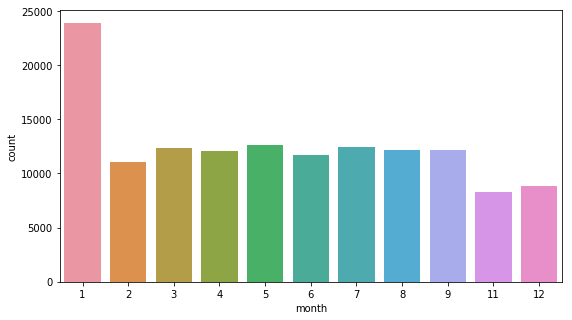

In [11]:
fig, ax = plt.subplots(1,1, figsize=(9, 5))
sns.countplot(ax=ax, x="month", data=df)
plt.show()

### Day

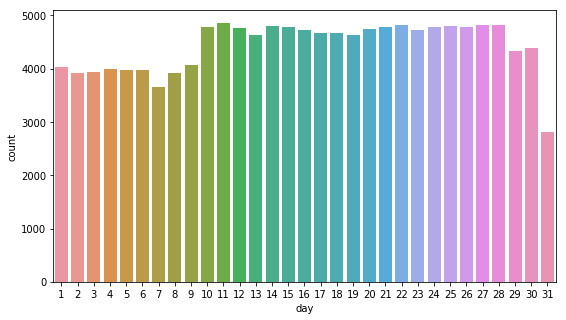

In [12]:
fig, ax = plt.subplots(1,1, figsize=(9, 5))
sns.countplot(ax=ax, x="day", data=df)
plt.show()

### Tags

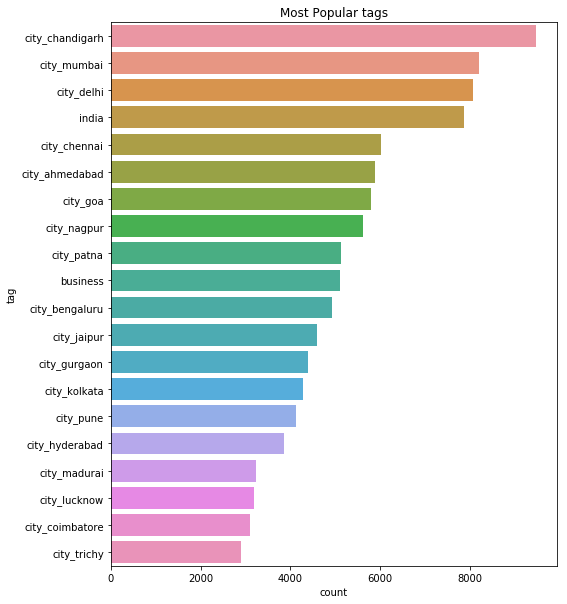

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8, 10))
sns.countplot(ax=ax, 
              y="tag", 
              data=df, 
              order=list(df.tag.value_counts().sort_values(ascending=False).index)[:20], 
              orient='h')
plt.title("Most Popular tags")
plt.show()

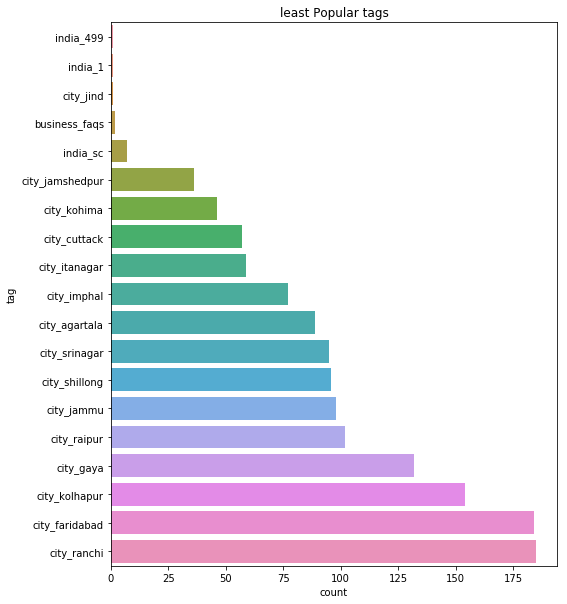

In [14]:
fig, ax = plt.subplots(1,1, figsize=(8, 10))
sns.countplot(ax=ax, 
              y="tag", 
              data=df, 
              order=list(df.tag.value_counts().sort_values(ascending=True).index)[1:20], 
              orient='h')
plt.title("least Popular tags")
plt.show()

### Location

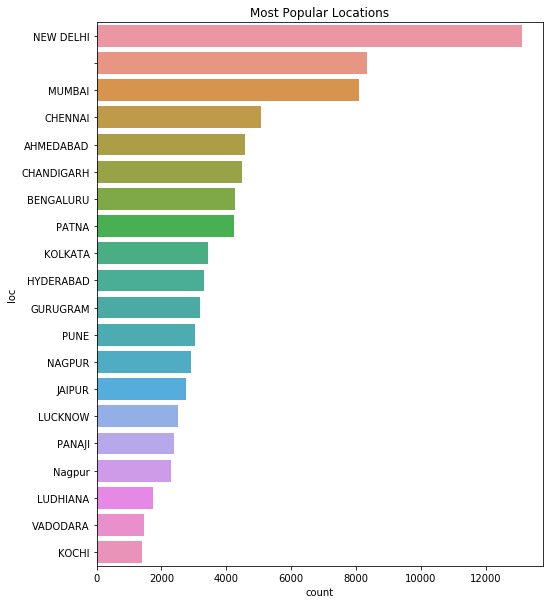

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8, 10))
sns.countplot(ax=ax, 
              y="loc", 
              data=df, 
              order=list(df["loc"].value_counts().sort_values(ascending=False).index)[:20], 
              orient='h')
plt.title("Most Popular Locations")
plt.show()

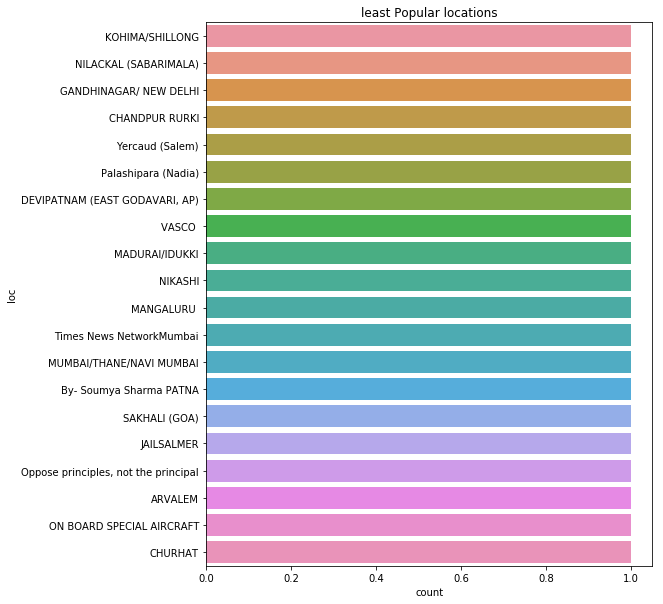

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8, 10))
sns.countplot(ax=ax, 
              y="loc", 
              data=df, 
              order=list(df['loc'].value_counts().sort_values(ascending=True).index)[:20], 
              orient='h')
plt.title("least Popular locations")
plt.show()

### Headline

### sample headlines

In [17]:
print(*list(df['headline'].sample(n=10, random_state=1)), sep='\n\n')

hams help reunite 90 year old with her long lost sisters family.

compost from household waste may be sold online.

india business_tvs q2 net profit dips marginally at rs 211 3 crore.

pune acb traps udaipur cops for taking bribe of rs 50k.

modi let rich people sweep bank money rahul.

unable to contact gsat 6a since saturday confirms isro.

30 accident victims are pedestrians.

annapurna three minors among four held for looting smartphones.

man 41 allegedly beaten to death by father in law.

cabinet panel reappoints former faculty at pgi.


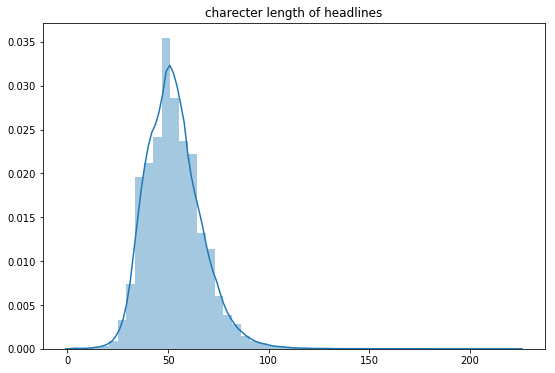

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.distplot(df['headline'].apply(lambda x: len(x)).values)
plt.title("charecter length of headlines")
plt.show()

### Title wordcloud

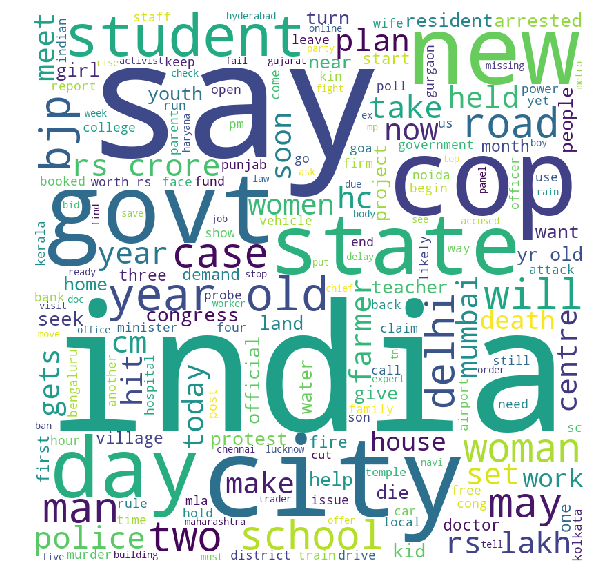

In [19]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
    width = 800, 
    height = 800, 
    background_color ='white', 
    stopwords = set(STOPWORDS), 
    min_font_size = 10)

wc_img = wordcloud.generate(' '.join(df.headline))
plt.figure(figsize=(8, 8), facecolor = None) 
plt.imshow(wc_img) 
plt.axis("off")
plt.tight_layout(pad=0) 
plt.show()

### Content

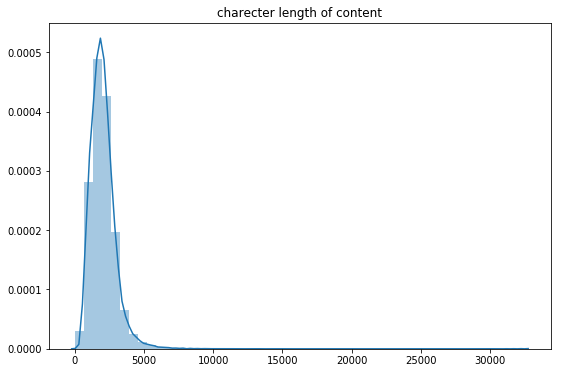

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.distplot(df['content'].apply(lambda x: len(x)).values)
plt.title("charecter length of content")
plt.show()

### Content Wordcloud

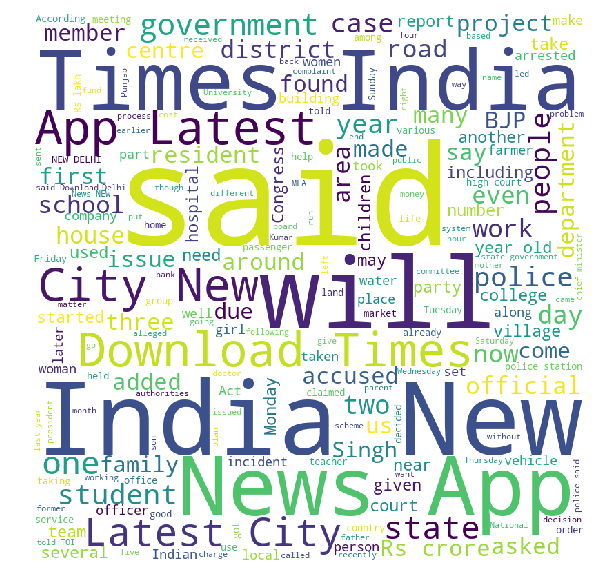

In [21]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
    width = 800, 
    height = 800, 
    background_color ='white', 
    stopwords = set(STOPWORDS), 
    min_font_size = 10)

wc_img = wordcloud.generate(' '.join(df.sample(1000).content))
plt.figure(figsize=(8, 8), facecolor = None) 
plt.imshow(wc_img) 
plt.axis("off")
plt.tight_layout(pad=0) 
plt.show()

In [22]:
df.to_csv("data.csv", index=False)

## Topic Modeling with LDA
ref : [link](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [23]:
import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
from nltk.corpus import stopwords

In [24]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [25]:
# Convert to list
#df = df.sample(5000)
data = df.content.values.tolist()

pprint(data[0])

('NEW DELHI: Jantar Mantar had never been so quiet with Parliament in session '
 '— the nerve centre of Indian protests being relegated to the background by '
 'NGT’s ban. On Monday, with the Supreme Court easing the restrictions, the '
 'area was somewhat buzzing again. The seasoned OROP protesters were quick to '
 'return, as were the quirky ones like Machindranath Suryavanshi from the All '
 'India Juta Maro Andolan. General (retd) Satbir Singh, who heads the United '
 'Front of Ex-servicemen — one of the petitioners against the ban — said the '
 'apex court order was a victory for the people. “Any mature democracy should '
 'allow an opportunity for its people to be heard. NGT was being used to '
 'stifle our rights,” he said. “Even after the NGT ban, we held a symbolic '
 'relay strike last year,” said Sudesh Goyal, wife of an armyman, adding that '
 'with Parliament so close to Jantar Mantar, no other site in Delhi was more '
 'appropriate for protests. Suryavanshi, who claims to

In [26]:
def sent_to_words(sentence):
        return gensim.utils.simple_preprocess(str(sentence), deacc=True)  # deacc=True removes punctuations

data_words = [sent_to_words(i) for i in tq(data)]

print(data_words[0])


['new', 'delhi', 'jantar', 'mantar', 'had', 'never', 'been', 'so', 'quiet', 'with', 'parliament', 'in', 'session', 'the', 'nerve', 'centre', 'of', 'indian', 'protests', 'being', 'relegated', 'to', 'the', 'background', 'by', 'ngt', 'ban', 'on', 'monday', 'with', 'the', 'supreme', 'court', 'easing', 'the', 'restrictions', 'the', 'area', 'was', 'somewhat', 'buzzing', 'again', 'the', 'seasoned', 'orop', 'protesters', 'were', 'quick', 'to', 'return', 'as', 'were', 'the', 'quirky', 'ones', 'like', 'machindranath', 'suryavanshi', 'from', 'the', 'all', 'india', 'juta', 'maro', 'andolan', 'general', 'retd', 'satbir', 'singh', 'who', 'heads', 'the', 'united', 'front', 'of', 'ex', 'servicemen', 'one', 'of', 'the', 'petitioners', 'against', 'the', 'ban', 'said', 'the', 'apex', 'court', 'order', 'was', 'victory', 'for', 'the', 'people', 'any', 'mature', 'democracy', 'should', 'allow', 'an', 'opportunity', 'for', 'its', 'people', 'to', 'be', 'heard', 'ngt', 'was', 'being', 'used', 'to', 'stifle', '

In [27]:
# # Build the bigram and trigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# # Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# # See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])

# def make_bigrams(texts):
#     return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [28]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in tq(texts)]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in tq(texts):
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [29]:
# Remove Stop Words
data_words = remove_stopwords(data_words)

# Form Bigrams
#data_words = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[0])

In [30]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
# Convert document into the bag-of-words (BoW) format = 
# list of (token_id, token_count) tuples.
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 5), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 5), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 1), (81, 7), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 3)]


In [31]:
# Build LDA model
NUM_TOPICS = 6
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=NUM_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [32]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('Perplexity: ', lda_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=data_lemmatized, 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -7.777544462427429
Coherence Score:  0.43897676179552053


**Print different topics with the weights of constituent words**

In [33]:
# Print the Keyword in the topics
for i, j in lda_model.print_topics():
    print("-"*80, "\n", i)
    pprint(j)

-------------------------------------------------------------------------------- 
 0
('0.033*"say" + 0.018*"woman" + 0.015*"family" + 0.014*"year" + 0.013*"take" + '
 '0.012*"old" + 0.010*"hospital" + 0.010*"late" + 0.009*"child" + 0.009*"go"')
-------------------------------------------------------------------------------- 
 1
('0.025*"say" + 0.017*"water" + 0.016*"official" + 0.014*"road" + 0.013*"area" '
 '+ 0.009*"work" + 0.009*"city" + 0.009*"traffic" + 0.009*"project" + '
 '0.008*"also"')
-------------------------------------------------------------------------------- 
 2
('0.056*"student" + 0.038*"school" + 0.019*"say" + 0.018*"college" + '
 '0.015*"year" + 0.015*"teacher" + 0.014*"class" + 0.014*"candidate" + '
 '0.010*"education" + 0.010*"course"')
-------------------------------------------------------------------------------- 
 3
('0.069*"police" + 0.023*"say" + 0.020*"accuse" + 0.018*"arrest" + '
 '0.017*"case" + 0.013*"station" + 0.011*"late" + 0.010*"complaint" + '
 '0.01

In [34]:
doc_lda = list(lda_model.get_document_topics(corpus))
print(*doc_lda[:5], sep='\n'+('-'*80)+'\n')

[(0, 0.09793467), (1, 0.08409095), (3, 0.045535043), (4, 0.3978596), (5, 0.3734092)]
--------------------------------------------------------------------------------
[(0, 0.048289843), (1, 0.039094806), (4, 0.81337166), (5, 0.09023458)]
--------------------------------------------------------------------------------
[(1, 0.23833413), (3, 0.012394288), (4, 0.23317485), (5, 0.5119247)]
--------------------------------------------------------------------------------
[(1, 0.22083536), (4, 0.01052863), (5, 0.756504)]
--------------------------------------------------------------------------------
[(1, 0.039109863), (4, 0.07861444), (5, 0.8700574)]


In [35]:
res = np.zeros((len(doc_lda), NUM_TOPICS))
for num, i in enumerate(doc_lda):
    for p, q in i:
        res[num, p-1] = q

df["topic"] = np.argmax(res, axis=1)+1
for i in range(1, 1+NUM_TOPICS):
    df["score_"+str(i)] = res[:,i-1]
df

,date,year,month,day,tag,loc,headline,title,content,topic,score_1,score_2,score_3,score_4,score_5,score_6
0,2018724,2018,7,24,city_delhi,NEW DELHI,city hotspot that saw nearly 24k protests a ye...,2018724_city_delhi_city-hotspot-that-saw-nearl...,NEW DELHI: Jantar Mantar had never been so qui...,4,0.084091,0.000000,0.045535,0.397860,0.373409,0.097935
1,2018722,2018,7,22,city_patna,PATNA,not afraid of rjds no trust motion bjp.,2018722_city_patna_not-afraid-of-rjds-no-trust...,PATNA: The BJP on Saturday said if the RJD dec...,4,0.039095,0.000000,0.000000,0.813372,0.090235,0.048290
2,201866,2018,6,6,city_jodhpur,JAIPUR,rs 100 cr eco tourism plan set to get centres ...,201866_city_jodhpur_rs-100-cr-eco-tourism-plan...,JAIPUR: Rajasthan’s proposal to create an eco-...,5,0.238334,0.000000,0.012394,0.233175,0.511925,0.000000
3,2018926,2018,9,26,city_chennai,CHENNAI,cyclonic circulation in bay may bring rain to ...,2018926_city_chennai_cyclonic-circulation-in-b...,CHENNAI: The city is expected to get more rain...,5,0.220835,0.000000,0.000000,0.010529,0.756504,0.000000
4,2018819,2018,8,19,business,Mumbai,india business_mitashi eyes doubling sales to ...,2018819_business_india-business_mitashi-eyes-d...,"Mumbai, Aug 19 () Homegrown consumer durables ...",5,0.039110,0.000000,0.000000,0.078614,0.870057,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137486,20181021,2018,1,21,city_goa,PANAJI,senior bjp members train guns at vinay tendulkar.,20181021_city_goa_senior-bjp-members-train-gun...,PANAJI: Calling for the dissolution of the sta...,4,0.000000,0.046739,0.000000,0.634955,0.304183,0.000000
137487,2018816,2018,8,16,city_chennai,CHENNAI,egmore school set up in 1783 gets facelift to ...,2018816_city_chennai_egmore-school-set-up-in-1...,"CHENNAI: Established in 1783, the Presidency G...",2,0.123389,0.515986,0.022770,0.042291,0.292135,0.000000
137488,20181220,2018,12,20,business,Coimbatore,india business_rabi sowing dips by 26l hectare...,20181220_business_india-business_rabi-sowing-d...,Coimbatore: Sowing of crops in the ongoing rab...,5,0.060263,0.000000,0.013499,0.061074,0.861879,0.000000
137489,2018418,2018,4,18,city_chennai,CHENNAI,five held for murder of fisherman.,2018418_city_chennai_five-held-for-murder-of-f...,CHENNAI: The Pallikaranai police have arrested...,6,0.078454,0.000000,0.385628,0.016249,0.081746,0.435129


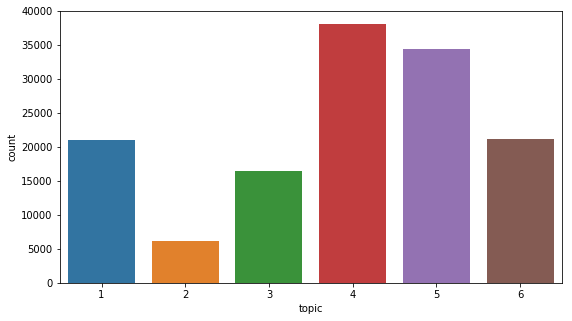

In [36]:
fig, ax = plt.subplots(1,1, figsize=(9, 5))
sns.countplot(ax=ax, x="topic", data=df)
plt.show()

In [37]:
df.to_csv("final.csv", index=False)